## Units and Quantities in Astropy

Use of equivalence -

In [18]:
import numpy as np
from astropy import units as u
beam_sigma = 50*u.arcsec
beam_area = 2*np.pi*(beam_sigma)**2
freq = 5*u.GHz
equiv = u.brightness_temperature(freq)

(1*u.Jy/beam_area).to(u.K, equivalencies=equiv)

<Quantity 3.52629392 K>

SpectralCoord examples to avoid using equivalences -

In [19]:
from astropy.coordinates import SpectralCoord
sc = SpectralCoord([654.2, 654.4, 654.6] * u.nm, redshift = 0.5)
sc.to(u.eV)

<SpectralCoord 
   (observer to target:
      radial_velocity=115304.79153846155 km / s
      redshift=0.5000000000000002)
  [1.89520328, 1.89462406, 1.89404519] eV>

In [20]:
sc.to(u.km / u.s, doppler_convention='optical', doppler_rest=656.65 * u.nm)

<SpectralCoord 
   (observer to target:
      radial_velocity=115304.79153846155 km / s
      redshift=0.5000000000000002
    doppler_rest=656.65 nm
    doppler_convention=optical)
  [-1118.5433977 , -1027.23373258,  -935.92406746] km / s>

In [21]:
sc.to_rest()

<SpectralCoord 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [436.13333333, 436.26666667, 436.4       ] nm>

In [22]:
sc.with_radial_velocity_shift(100000 * u.km / u.s)

<SpectralCoord 
   (observer to target:
      radial_velocity=215304.79153846155 km / s
      redshift=1.469152751250609)
  [925.41874739, 925.70166355, 925.9845797 ] nm>

## SpectralCube

Opening a datacube -

In [23]:
from astropy.utils import data
from spectral_cube import SpectralCube
fn = data.get_pkg_data_filename('tests/data/example_cube.fits', 'spectral_cube')
cube = SpectralCube.read(fn)

print(cube)

SpectralCube with shape=(7, 4, 3) and unit=Jy / beam:
 n_x:      3  type_x: RA---ARC  unit_x: deg    range:    52.231466 deg:   52.231544 deg
 n_y:      4  type_y: DEC--ARC  unit_y: deg    range:    31.243639 deg:   31.243739 deg
 n_s:      7  type_s: VRAD      unit_s: m / s  range:    14322.821 m / s:   14944.909 m / s


In [24]:
cube.with_spectral_unit(u.GHz)

SpectralCube with shape=(7, 4, 3) and unit=Jy / beam:
 n_x:      3  type_x: RA---ARC  unit_x: deg    range:    52.231466 deg:   52.231544 deg
 n_y:      4  type_y: DEC--ARC  unit_y: deg    range:    31.243639 deg:   31.243739 deg
 n_s:      7  type_s: FREQ      unit_s: GHz    range:      225.885 GHz:     225.886 GHz

In [25]:
slab = cube.with_spectral_unit(u.GHz).spectral_slab(98 * u.GHz, 100 * u.GHz)

In [26]:
slab

SpectralCube with shape=(1, 4, 3) and unit=Jy / beam:
 n_x:      3  type_x: RA---ARC  unit_x: deg    range:    52.231466 deg:   52.231544 deg
 n_y:      4  type_y: DEC--ARC  unit_y: deg    range:    31.243639 deg:   31.243739 deg
 n_s:      1  type_s: FREQ      unit_s: GHz    range:      225.885 GHz:     225.885 GHz

In [27]:
masked_slab = slab.with_mask(slab > 1 * u.Jy/u.beam)

In [28]:
masked_slab

SpectralCube with shape=(1, 4, 3) and unit=Jy / beam:
 n_x:      3  type_x: RA---ARC  unit_x: deg    range:    52.231466 deg:   52.231544 deg
 n_y:      4  type_y: DEC--ARC  unit_y: deg    range:    31.243639 deg:   31.243739 deg
 n_s:      1  type_s: FREQ      unit_s: GHz    range:      225.885 GHz:     225.885 GHz

In [29]:
slab.moment(order=1)

<Projection [[225.88545886, 225.88545886, 225.88545886],
             [225.88545886, 225.88545886, 225.88545886],
             [225.88545886, 225.88545886, 225.88545886],
             [225.88545886, 225.88545886, 225.88545886]] GHz>

## Astroquery

In [30]:
from astroquery.simbad import Simbad
Simbad.query_object("T Tau")

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
V* T Tau,04 21 59.4323,+19 32 06.439,14,14,0.059,0.029,90,A,O,2018yCat.1345....0G


## Some Useful IPython Commands

In [31]:
from astropy.utils import data

In [34]:
%pdoc data.get_pkg_data_filename

In [35]:
%pdef data.get_pkg_data_filename

 data.get_pkg_data_filename(
    data_name,
    package=None,
    show_progress=True,
    remote_timeout=None,
)
 

You can also use shift-tab for the above.

In [36]:
%psource data.get_pkg_data_filename

In [37]:
%env USER

'gurmeet'

In [38]:
%time sum([1, 2, 3, 4, 5, 6])

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 20.5 µs


21

In [39]:
%who

DEFAULT_PAR	 Simbad	 SpectralCoord	 SpectralCube	 beam_area	 beam_sigma	 cube	 data	 def_	 
e	 equiv	 f	 fn	 freq	 k	 masked_slab	 np	 o	 
pars	 read_SDC_cat	 read_sofia_cat	 run_sofia	 s	 sc	 slab	 sub	 t	 
tools	 u	 v	 


In [40]:
%who list

No variables match your requested type.


You can also use %pwd and %cd which works as pwd and cd in shell.
You can run python scripts as "%run test.py".

## Toolkit

In [41]:
## The line below is required to read the changes in the file. That is, you can change the tools.py file
## and run this cell to load it again.
%run tools.py

import tools

In [42]:
par = {
        'input.data'                 :  'sofia_test_datacube.fits',
        'scaleNoise.mode'            :  'local',
        'scaleNoise.windowXY'        :  31,
        'scaleNoise.windowZ'         :  31,
        'scfind.kernelsXY'           :  '0, 5, 10',
        'scfind.threshold'           :  3.5,
        'reliability.enable'         :  'true',
        'reliability.fmin'           :  25.0,
        'output.directory'           :  'sofia_test',
        'output.filename'            :  'sofia_test_output',
        'output.writeMask'           :  'true',
        'output.writeMask2d'         :  'true',
        'output.writeMoments'        :  'true',
        'output.marginCubelets'      :  10,
        'output.overwrite'           :  'true'
    }

o, e = run_sofia(par, "t.par")
print(o)

____________________________________________________________________________

 Pipeline started
____________________________________________________________________________

  Using:    Source Finding Application (SoFiA)
  Version:  2.2.1 (18-Nov-2020)
  CPU:      12 cores available
  Time:     Mon Jan 18 07:29:34 2021

____________________________________________________________________________

 Loading parameter settings
____________________________________________________________________________

  Activating SoFiA default parameter settings.
  Loading user parameter file: 't.par'.

  Using all 12 available CPU cores.

____________________________________________________________________________

 Loading data cube
____________________________________________________________________________

  Opening FITS file 'sofia_test_datacube.fits'.
  Reading FITS data with the following specifications:
    Data type:    -32
    No. of axes:  3
    Axis sizes:   200, 200, 100
    Region:      

In [43]:
par['scfind.threshold'] = 5.0
o, e = run_sofia(par, "t.par")
print(o)

____________________________________________________________________________

 Pipeline started
____________________________________________________________________________

  Using:    Source Finding Application (SoFiA)
  Version:  2.2.1 (18-Nov-2020)
  CPU:      12 cores available
  Time:     Mon Jan 18 07:29:35 2021

____________________________________________________________________________

 Loading parameter settings
____________________________________________________________________________

  Activating SoFiA default parameter settings.
  Loading user parameter file: 't.par'.

  Using all 12 available CPU cores.

____________________________________________________________________________

 Loading data cube
____________________________________________________________________________

  Opening FITS file 'sofia_test_datacube.fits'.
  Reading FITS data with the following specifications:
    Data type:    -32
    No. of axes:  3
    Axis sizes:   200, 200, 100
    Region:      

In [44]:
sof_cat = read_sofia_cat('sofia_test/sofia_test_output_cat.txt')

In [45]:
sof_cat.meta

{'Name': 'SoFiA source catalogue',
 'Creator': 'SoFiA 2.2.1',
 'Time': 'Mon, 18 Jan 2021, 07'}

In [46]:
sof_cat.show_in_notebook()

idx,name,id,x,y,z,x_min,x_max,y_min,y_max,z_min,z_max,n_pix,f_min,f_max,f_sum,rel,flag,rms,w20,w50,ell_maj,ell_min,ell_pa,ell3s_maj,ell3s_min,ell3s_pa,kin_pa,err_x,err_y,err_z,err_f_sum,ra,dec,v_app
,,,pix,pix,pix,pix,pix,pix,pix,pix,pix,,Jy / beam,Jy / beam,Jy / beam,,,Jy / beam,pix,pix,pix,pix,deg,pix,pix,deg,deg,pix,pix,pix,Jy / beam,deg,deg,m / s
0,SoFiA J120120.94+615351.3,1,129.125264,20.629763,65.647254,107.0,152.0,6.0,40.0,26.0,92.0,9739,-0.001793,0.008109,6.595021,1.0,0,0.000511323,63.124195,59.770925,18.958007,8.378541,84.677761,20.724186,9.731326,85.721676,261.906859,0.053727,0.032332,0.111765,0.050461,180.337261,61.897581,1453680.0
1,SoFiA J120215.81+620729.5,2,90.614687,102.608734,39.348163,32.0,114.0,48.0,131.0,9.0,57.0,40800,-0.001631,0.021599,61.767522,1.0,0,0.000516049,28.943364,23.634322,26.277876,21.368981,-62.44297,43.368769,26.372479,-60.354304,217.812396,0.027431,0.021859,0.012698,0.104237,180.565878,62.124867,1236850.0
2,SoFiA J120142.94+621931.7,3,113.741005,174.986039,22.751703,105.0,127.0,166.0,186.0,10.0,35.0,3418,-0.001774,0.008729,4.694258,1.0,0,0.000504725,22.160035,19.664324,7.774647,4.984523,-19.25138,10.803999,7.001589,-35.348313,173.651404,0.022133,0.024837,0.032181,0.029508,180.428926,62.325474,1100010.0


In [47]:
dev_cat = read_SDC_cat('SDC2_Data/dev_s/sky_dev_truthcat.txt')
dev_cat

id,ra,dec,hi_size,line_flux_integral,central_freq,pa,i,w20
int64,float64,float64,float64,float64,float64,float64,float64,float64
0,180.0367431640625,-29.837249755859375,3.7822696294527525,3.698041203815269,1119836160.0,64.54845428466797,87.65090942382812,185.10670347108328
1,179.9273223876953,-30.195167541503906,4.727462741206519,4.06404204296554,1119258112.0,335.845703125,19.59524917602539,122.19619537975709
2,179.7300567626953,-29.959510803222656,5.023231014001445,4.907697409436818,1138250496.0,60.84117126464844,36.59712600708008,217.35263089634387
3,179.7838592529297,-29.76906967163086,2.41584374736941,4.425709459923476,1122002432.0,180.326416015625,68.60360717773438,435.9049549560843
4,179.90086364746094,-30.00284194946289,3.1297862594364703,5.575136075334787,1145224192.0,202.48110961914062,60.04961395263672,328.1923873000543
5,180.0425262451172,-30.01044273376465,2.890633105554849,5.647577878994687,1145574400.0,155.01280212402344,82.60425567626953,176.75757697256142
6,180.19903564453125,-30.090055465698242,2.927574146808172,4.489620226439965,1121802240.0,104.42633819580078,62.8516960144043,338.33531425831336
7,180.10592651367188,-30.182056427001953,2.5035266406092442,4.737801088154173,1121524096.0,129.8621826171875,73.1800537109375,456.2034888921843
8,179.82733154296875,-29.918180465698242,2.712400275919063,6.053636460231165,1145596672.0,327.497802734375,77.27220916748047,465.6176472576976


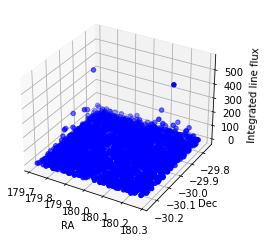

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(dev_cat['ra'], dev_cat['dec'], dev_cat['line_flux_integral'], color='b')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('Integrated line flux')

plt.show()

In [49]:
dev_cat.sort(['line_flux_integral'], reverse = True)

In [50]:
dev_cat ## dev_cat.show_in_notebook() or dev_cat.show_in_browser(jsviewer = True) for interactive

id,ra,dec,hi_size,line_flux_integral,central_freq,pa,i,w20
int64,float64,float64,float64,float64,float64,float64,float64,float64
701,180.26791381835938,-29.983800888061523,35.73054490935102,566.6747759983484,1108079232.0,1.2157917022705078,87.32292175292969,798.4859955973991
226,179.79489135742188,-29.908550262451172,39.77877927006476,446.5794903512234,1122020224.0,293.52197265625,48.21644973754883,512.670926407148
225,179.82937622070312,-30.03167724609375,29.419230985437085,265.68880769242804,1122635648.0,134.94618225097656,78.9703140258789,406.369624159578
700,180.1607208251953,-29.92746925354004,30.94924199415425,243.96290869450243,1109079424.0,290.015380859375,62.43174362182617,376.86655070539007
224,180.09771728515625,-29.801000595092773,25.097465890764052,188.57571097271477,1114165248.0,92.61054229736328,78.99885559082031,381.17765391146827
699,180.03268432617188,-30.185619354248047,10.98977040153908,185.92531839452877,1100236800.0,13.265304565429688,50.77131652832031,281.8102923073377
223,179.7897491455078,-30.131210327148438,24.361358770456423,183.80720190707663,1123033344.0,226.52513122558594,69.0820083618164,353.01745571898306
698,180.20526123046875,-29.874109268188477,35.99467911094883,176.29466524281315,1101164928.0,74.81852722167969,71.20033264160156,748.1991118083421
222,180.25021362304688,-29.967220306396484,24.579566316855725,174.38707742978622,1126808960.0,117.8923110961914,33.95269012451172,373.1538227821033


In [61]:
dev_cat[0]

id,ra,dec,hi_size,line_flux_integral,central_freq,pa,i,w20
int64,float64,float64,float64,float64,float64,float64,float64,float64
701,180.26791381835938,-29.983800888061523,35.73054490935102,566.6747759983484,1108079232.0,1.2157917022705078,87.32292175292969,798.4859955973991


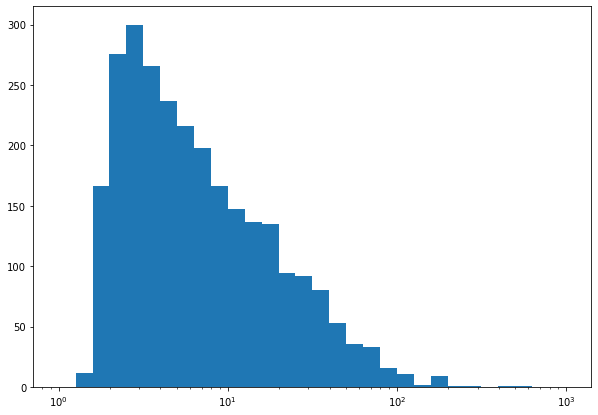

In [52]:
from matplotlib import pyplot as plt 
    
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dev_cat['line_flux_integral'], bins=pow(10, np.array(range(0, 31))/10)) 
ax.semilogx()

plt.show()

In [53]:
cube = SpectralCube.read('SDC2_Data/dev_s/sky_dev.fits')

In [54]:
cube

SpectralCube with shape=(6668, 643, 643) and unit=Jy / beam:
 n_x:    643  type_x: RA---SIN  unit_x: deg    range:   179.710980 deg:  180.289020 deg
 n_y:    643  type_y: DEC--SIN  unit_y: deg    range:   -30.249353 deg:  -29.750019 deg
 n_s:   6668  type_s: FREQ      unit_s: Hz     range: 950000000.000 Hz:1150010000.000 Hz

In [55]:
s = cube.subcube(xlo=179.79*u.deg, xhi=179.8*u.deg, ylo=-29.915*u.deg, yhi=-29.9*u.deg, zlo=1121*u.MHz, zhi=1123*u.MHz)

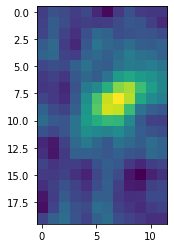

In [56]:
s.moment(order=0).quicklook()

In [59]:
sub = cube.subcube(xlo=179.95*u.deg, xhi=180.05*u.deg,
                 ylo=-30.05*u.deg, yhi=-29.95*u.deg,
                 zlo=1*u.GHz, zhi=1.1*u.GHz)
sub.write('test.fits')

pars = {
        'input.data'                 :  'test.fits',
        'scaleNoise.mode'            :  'local',
        'scaleNoise.windowXY'        :  31,
        'scaleNoise.windowZ'         :  31,
        'scfind.kernelsXY'           :  '0, 5, 10',
        'scfind.threshold'           :  3.5,
        'reliability.enable'         :  'false',
        'output.directory'           :  'sofia_test',
        'output.filename'            :  'sofia_test_output',
        'output.overwrite'           :  'true'
    }

o, e = run_sofia(pars, "t.par")
print(o)

____________________________________________________________________________

 Pipeline started
____________________________________________________________________________

  Using:    Source Finding Application (SoFiA)
  Version:  2.2.1 (18-Nov-2020)
  CPU:      12 cores available
  Time:     Mon Jan 18 07:30:06 2021

____________________________________________________________________________

 Loading parameter settings
____________________________________________________________________________

  Activating SoFiA default parameter settings.
  Loading user parameter file: 't.par'.

  Using all 12 available CPU cores.

____________________________________________________________________________

 Loading data cube
____________________________________________________________________________

  Opening FITS file 'test.fits'.
  Reading FITS data with the following specifications:
    Data type:    -32
    No. of axes:  3
    Axis sizes:   113, 130, 3334
    Region:       0-112, 0-129,

In [60]:
t = read_sofia_cat('sofia_test/sofia_test_output_cat.txt')
t.show_in_browser(jsviewer = True)